In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression, make_classification
import tensorflow as tf
%matplotlib inline

# Tensorflow
* Placeholders -- input and output data
* Variables -- updateable parameters of the graph

## Computing simple functions with Tensorflow

Calculate function: $Y = 2*X$

In [251]:
tf.reset_default_graph()

# Part 1: Make the computation graph
X_tensor = tf.placeholder(tf.float32, [None], name = 'X') # tensor X with shape None, i.e. one dim array
Y_tensor = 2*X_tensor # tensor Y

# Part 2: Execute the computation graph
X = np.arange(10) # here are some values for X

sess = tf.Session() # open a session
Y = sess.run( # run session
    [Y_tensor], # tensor to evaluate
    feed_dict={X_tensor:X}) # values for the placeholders

print(Y)

[array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.], dtype=float32)]


Calculate function Z = X + sin(Y)

In [101]:
tf.reset_default_graph()

# Part 1: Make the computation graph
X_tensor = tf.placeholder(tf.float32, [None], name = 'X') # tensor X with shape None, i.e. one dim array
Y_tensor = tf.placeholder(tf.float32, [None], name = 'Y') # tensor X with shape None, i.e. one dim array
Z_tensor = X_tensor + tf.sin(Y_tensor)

# Part 2: Execute the computation graph
X = np.arange(10) # here are some values for X
Y = np.arange(10)

sess = tf.Session() # open a session
Z = sess.run( # run session
    [Z_tensor], # tensor to evaluate
    feed_dict={X_tensor:X, Y_tensor:Y}) # values for the placeholders

print(Z)

[array([0.       , 1.841471 , 2.9092975, 3.14112  , 3.2431974, 4.0410757,
       5.7205844, 7.6569867, 8.989358 , 9.412119 ], dtype=float32)]


## Optimization problems with Tensorflow

Find the minimum of parabola: $y = x^2-10x+35$

... well, if we know Math, the minimum should be at x = 5, y = 10

Single optimization step: X=1.000, Y=35.000


/opt/anaconda3/envs/jh/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


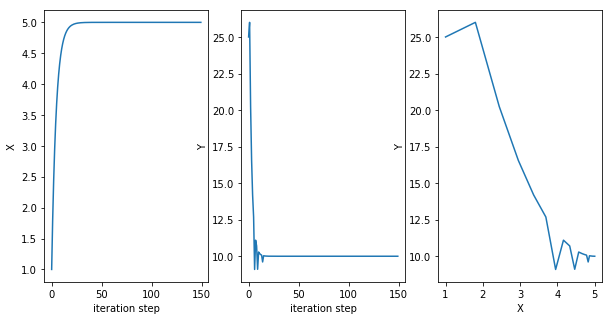

In [257]:
tf.reset_default_graph()

# Part 1: Make the computation graph
X_tensor = tf.get_variable("X", [1], initializer = tf.zeros_initializer())
Y_tensor = tf.square(X_tensor)-10*X_tensor+35

learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(Y_tensor)

init = tf.global_variables_initializer()

# A single step towards optimization:
sess = tf.Session() # open a session
sess.run(init)
_, X, Y = sess.run( # run session
    [optimizer, X_tensor, Y_tensor], # tensor to evaluate
    feed_dict={}) # values for the placeholders
print("Single optimization step: X=%.3f, Y=%.3f"%(X,Y))

# Multiple optimization steps:
num_steps = 150

sess = tf.Session() # open a session
sess.run(init)

Xs, Ys = [], []
for step in range(num_steps):
    _, X, Y = sess.run( # run session
        [optimizer, X_tensor, Y_tensor], # tensor to evaluate
        feed_dict={}) # values for the placeholders
    Xs.append(X)
    Ys.append(Y)
    #print("Step %d: X=%.4f, Y=%.4f"%(step,X,Y))
    
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(Xs)
ax1.set_xlabel('iteration step')
ax1.set_ylabel('X')
ax2 = fig.add_subplot(1,3,2)
ax2.plot(Ys)
ax2.set_xlabel('iteration step')
ax2.set_ylabel('Y')
ax3 = fig.add_subplot(1,3,3)
ax3.plot(Xs,Ys)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
fig.show()

In [142]:
# Find the fastest stable learning_rate and num_steps

Copy the code above and find X and Y that minimize $Z = sin\left(\sqrt{X^2+Y^2-4X-6Y+13}\right)$. Below is the visualization of the function:


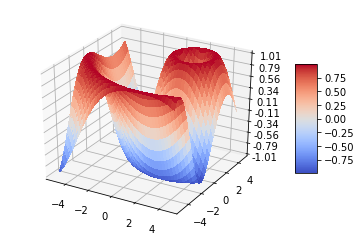

In [149]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2+Y**2 - 4*X-6*Y+13)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Single optimization step: X=0.400, Y=0.600, Z = 13.000
Step 0: X=0.4000, Y=0.6000, Z = 13.000
Step 1: X=0.7200, Y=1.0800, Z = 8.678
Step 2: X=0.9760, Y=1.4640, Z = 5.759
Step 3: X=1.1808, Y=1.7712, Z = 3.850
Step 4: X=1.3446, Y=2.0170, Z = 2.181
Step 5: X=1.4757, Y=2.2136, Z = 1.766
Step 6: X=1.5806, Y=2.3709, Z = 1.214
Step 7: X=1.6645, Y=2.4967, Z = 0.844
Step 8: X=1.7316, Y=2.5973, Z = 0.594
Step 9: X=1.7853, Y=2.6779, Z = 0.234
Step 10: X=1.8282, Y=2.7423, Z = 0.150
Step 11: X=1.8626, Y=2.7938, Z = 0.223
Step 12: X=1.8900, Y=2.8351, Z = 0.061
Step 13: X=1.9120, Y=2.8681, Z = 0.039
Step 14: X=1.9296, Y=2.8944, Z = 0.025
Step 15: X=1.9437, Y=2.9156, Z = 0.071
Step 16: X=1.9550, Y=2.9324, Z = 0.010
Step 17: X=1.9640, Y=2.9460, Z = 0.007
Step 18: X=1.9712, Y=2.9568, Z = 0.033
Step 19: X=1.9769, Y=2.9654, Z = 0.003
Step 20: X=1.9816, Y=2.9723, Z = 0.002
Step 21: X=1.9852, Y=2.9779, Z = 0.001
Step 22: X=1.9882, Y=2.9823, Z = 0.012
Step 23: X=1.9906, Y=2.9858, Z = 0.010
Step 24: X=1.9924,

/opt/anaconda3/envs/jh/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


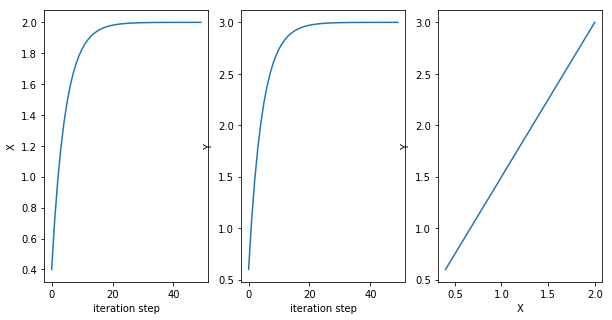

In [154]:
tf.reset_default_graph()

# Part 1: Make the computation graph
X_tensor = tf.get_variable("X", [1], initializer = tf.zeros_initializer())
Y_tensor = tf.get_variable("Y", [1], initializer = tf.zeros_initializer())
Z_tensor = tf.square(X_tensor)+tf.square(Y_tensor) - 4*X_tensor-6*Y_tensor+13

learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(Z_tensor)

init = tf.global_variables_initializer()

# A single step towards optimization:
sess = tf.Session() # open a session
sess.run(init)
_, X, Y, Z = sess.run( # run session
    [optimizer, X_tensor, Y_tensor, Z_tensor], # tensor to evaluate
    feed_dict={}) # values for the placeholders
print("Single optimization step: X=%.3f, Y=%.3f, Z = %.3f"%(X,Y,Z))

# Multiple optimization steps:
num_steps = 50

sess = tf.Session() # open a session
sess.run(init)

Xs, Ys, Zs = [], [], []
for step in range(num_steps):
    _, X, Y, Z = sess.run( # run session
        [optimizer, X_tensor, Y_tensor, Z_tensor], # tensor to evaluate
        feed_dict={}) # values for the placeholders
    Xs.append(X)
    Ys.append(Y)
    Zs.append(Z)
    print("Step %d: X=%.4f, Y=%.4f, Z = %.3f"%(step,X,Y,Z))
    
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(Xs)
ax1.set_xlabel('iteration step')
ax1.set_ylabel('X')
ax2 = fig.add_subplot(1,3,2)
ax2.plot(Ys)
ax2.set_xlabel('iteration step')
ax2.set_ylabel('Y')
ax3 = fig.add_subplot(1,3,3)
ax3.plot(Xs,Ys)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
fig.show()

# Linear Regression with Tensorflow

In [25]:
# Make a synthetic dataset
X, y = make_regression(n_features = 2)
print(X.shape, y.shape)

(100, 2) (100,)


In [26]:
# Make sure that the input and output data shapes are fine

def maybe_transform_Xy(X,y):
    # number of features has to be less than the number of data points
    # the assumption for further code is X.shape == (num_features, num_points)
    num_features, num_points = X.shape
    if num_features > num_points:
        X = X.T
    
    # y.shape == (1, num_points)
    if len(y.shape) != 2:
        y = y.reshape(1,-1)
    
    assert y.shape[1] == X.shape[1]
    
    return X,y

X, y = maybe_transform_Xy(X,y)
print(X.shape, y.shape)

(2, 100) (1, 100)


In [28]:
def create_placeholders(n_features):
    X = tf.placeholder(tf.float32, [n_features, None], name = 'X')
    y = tf.placeholder(tf.float32, [1, None], name = 'y')
    return X,y

tf.reset_default_graph()
X_tensor, y_tensor = create_placeholders(X.shape[0])
print(X_tensor, y_tensor)

Tensor("X:0", shape=(2, ?), dtype=float32) Tensor("y:0", shape=(1, ?), dtype=float32)


In [32]:
def initialize_parameters(n_features):
    W = tf.get_variable("W", [n_features, 1], initializer = tf.zeros_initializer())
    b = tf.get_variable("b", [1], initializer = tf.zeros_initializer())
    parameters = {'W':W,'b':b}
    return parameters

tf.reset_default_graph()
parameters = initialize_parameters(X.shape[1])
print(parameters)

{'b': <tf.Variable 'b:0' shape=(1,) dtype=float32_ref>, 'W': <tf.Variable 'W:0' shape=(100, 1) dtype=float32_ref>}


In [33]:
def forward_propagation(X_tensor, parameters):
    W, b = parameters['W'], parameters['b']
    return tf.matmul(tf.transpose(W),X_tensor)+b

tf.reset_default_graph()
with tf.Session() as sess:
    X_tensor, y_tensor = create_placeholders(2)
    parameters = initialize_parameters(2)
    y_hat = forward_propagation(X_tensor, parameters)
    print("y_hat = %s" %str(y_hat))

y_hat = Tensor("add:0", shape=(1, ?), dtype=float32)


In [74]:
def compute_cost(y_hat_tensor, y_tensor):
    return tf.reduce_mean(tf.losses.mean_squared_error(y_tensor, y_hat_tensor))

tf.reset_default_graph()

with tf.Session() as sess:
    X_tensor, y_tensor = create_placeholders(2)
    parameters = initialize_parameters(2)
    y_hat_tensor = forward_propagation(X_tensor, parameters)
    cost = compute_cost(y_hat_tensor, y_tensor)
    print("cost = %s" %str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


Iteration 0, cost: 5844.791
Iteration 1, cost: 3581.822
Iteration 2, cost: 2199.254
Iteration 3, cost: 1353.088
Iteration 4, cost: 834.256
Iteration 5, cost: 515.509
Iteration 6, cost: 319.285
Iteration 7, cost: 198.226
Iteration 8, cost: 123.373
Iteration 9, cost: 76.982


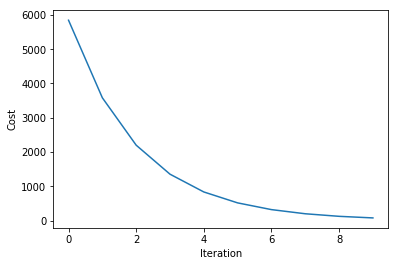

Train mean squared error: 48.160
Test mean squared error: 42.201


In [75]:
def model(X_train, y_train, X_test, y_test, num_iterations = 100, learning_rate = 0.1, print_cost = False,
         show_plot = True):
    tf.reset_default_graph()
    n_features, n_x = X_train.shape
    n_y = y_train.shape[0]
    
    X_tensor, y_tensor = create_placeholders(n_features)
    parameters = initialize_parameters(n_features)
    y_hat_tensor = forward_propagation(X_tensor, parameters)
    cost = compute_cost(y_hat_tensor, y_tensor)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    costs = []
    with tf.Session() as sess:
        sess.run(init)
        for i in range(num_iterations):
            _, c = sess.run([optimizer,cost],feed_dict={
                X_tensor:X_train, y_tensor:y_train
            })
            costs.append(c)
            if print_cost and i % 1 == 0:
                print("Iteration %d, cost: %.3f" %(i,c))
        if show_plot:
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(np.squeeze(costs))
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Cost')
            plt.show()

        parameters = sess.run(parameters)
        W, b = parameters['W'], parameters['b']
        
        mse_train = cost.eval({X_tensor:X_train, y_tensor:y_train})
        print("Train mean squared error: %.3f"%mse_train)
        
        mse_test = cost.eval({X_tensor:X_test, y_tensor:y_test})
        print("Test mean squared error: %.3f"%mse_test)
        
        y_pred_test = y_tensor.eval({X_tensor:X_test, y_tensor:y_test})
        y_pred_train = y_tensor.eval({X_tensor:X_train, y_tensor:y_train})
        
        d = {'costs': costs, 'y_pred_test':y_pred_test,'y_pred_train':y_pred_train,
             'W':W, 'b':b,'learning_rate':learning_rate,'num_iterations':num_iterations}
        
        return d
    
X_train, X_test = X[:,:70],X[:,70:] 
y_train, y_test = y[:,:70],y[:,70:] 
parameters = model(X_train,y_train,X_test,y_test, num_iterations = 10, print_cost = True, show_plot = True)
#print(parameters)

In [ ]:
# Try TensorFlow linear regression on any dataset

# Logistic Regression with TensorFlow

In [155]:
# Make a synthetic dataset
X, y = make_classification()


In [156]:
# Make sure that the input and output data shapes are fine

def maybe_transform_Xy(X,y):
    # number of features has to be less than the number of data points
    # the assumption for further code is X.shape == (num_features, num_points)
    num_features, num_points = X.shape
    if num_features > num_points:
        X = X.T
    
    # y.shape == (1, num_points)
    if len(y.shape) != 2:
        y = y.reshape(1,-1)
    
    assert y.shape[1] == X.shape[1]
    
    return X,y

X, y = maybe_transform_Xy(X,y)
print(X.shape, y.shape)

(20, 100) (1, 100)


In [162]:
def create_placeholders(n_features):
    X = tf.placeholder(tf.float32, [n_features, None], name = 'X')
    y = tf.placeholder(tf.float32, [1, None], name = 'y')
    return X,y

tf.reset_default_graph()
X_tensor, y_tensor = create_placeholders(X.shape[0])
print(X_tensor, y_tensor)

Tensor("X:0", shape=(20, ?), dtype=float32) Tensor("y:0", shape=(1, ?), dtype=float32)


In [163]:
def initialize_parameters(n_features):
    W = tf.get_variable("W", [n_features, 1], initializer = tf.zeros_initializer(), dtype = tf.float32)
    b = tf.get_variable("b", [1], initializer = tf.zeros_initializer(), dtype = tf.float32)
    parameters = {'W':W,'b':b}
    return parameters

tf.reset_default_graph()
parameters = initialize_parameters(X.shape[0])
print(parameters)

{'b': <tf.Variable 'b:0' shape=(1,) dtype=float32_ref>, 'W': <tf.Variable 'W:0' shape=(20, 1) dtype=float32_ref>}


In [167]:
def forward_propagation(X_tensor, parameters):
    W, b = parameters['W'], parameters['b']
    a = tf.matmul(tf.transpose(W),X_tensor)+b
    z = 1/(1+tf.exp(-a))
    return z

tf.reset_default_graph()
with tf.Session() as sess:
    X_tensor, y_tensor = create_placeholders(2)
    parameters = initialize_parameters(2)
    y_hat = forward_propagation(X_tensor, parameters)
    print("y_hat = %s" %str(y_hat))

y_hat = Tensor("truediv:0", shape=(1, ?), dtype=float32)


In [215]:
def compute_cost(y_hat_tensor, y_tensor):
    losses = tf.multiply(y_tensor,tf.log(y_hat_tensor))+tf.multiply(1-y_tensor,tf.log(1-y_hat_tensor))
    return tf.reduce_mean(-losses)

tf.reset_default_graph()

with tf.Session() as sess:
    X_tensor, y_tensor = create_placeholders(2)
    parameters = initialize_parameters(2)
    y_hat_tensor = forward_propagation(X_tensor, parameters)
    cost = compute_cost(y_hat_tensor, y_tensor)
    print("cost = %s" %str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [239]:
def compute_accuracy(y_hat_tensor, y_tensor):
    matches = tf.equal(tf.round(y_hat_tensor),y_tensor)
    accuracy = tf.reduce_mean(tf.cast(matches,dtype = tf.float32))*100
    return accuracy

tf.reset_default_graph()

with tf.Session() as sess:
    X_tensor, y_tensor = create_placeholders(2)
    parameters = initialize_parameters(2)
    y_hat_tensor = forward_propagation(X_tensor, parameters)
    accuracy = compute_accuracy(y_hat_tensor, y_tensor)
    print("accuracy = %s" %str(accuracy))

accuracy = Tensor("mul:0", shape=(), dtype=float32)


Iteration 0, cost: 0.693
Iteration 100, cost: 0.288
Iteration 200, cost: 0.260
Iteration 300, cost: 0.248
Iteration 400, cost: 0.241
Iteration 500, cost: 0.237
Iteration 600, cost: 0.234
Iteration 700, cost: 0.231
Iteration 800, cost: 0.229
Iteration 900, cost: 0.228
Iteration 1000, cost: 0.227
Iteration 1100, cost: 0.226
Iteration 1200, cost: 0.225
Iteration 1300, cost: 0.224
Iteration 1400, cost: 0.223
Iteration 1500, cost: 0.223
Iteration 1600, cost: 0.222
Iteration 1700, cost: 0.222
Iteration 1800, cost: 0.221
Iteration 1900, cost: 0.221
Iteration 2000, cost: 0.221
Iteration 2100, cost: 0.221
Iteration 2200, cost: 0.220
Iteration 2300, cost: 0.220
Iteration 2400, cost: 0.220
Iteration 2500, cost: 0.220
Iteration 2600, cost: 0.220
Iteration 2700, cost: 0.219
Iteration 2800, cost: 0.219
Iteration 2900, cost: 0.219
Iteration 3000, cost: 0.219
Iteration 3100, cost: 0.219
Iteration 3200, cost: 0.219
Iteration 3300, cost: 0.219
Iteration 3400, cost: 0.219
Iteration 3500, cost: 0.219
Iter

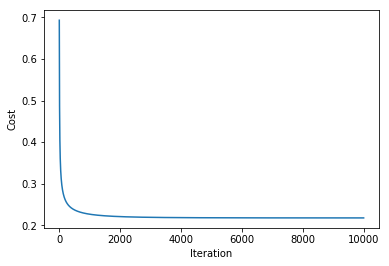

Train accuracy: 90.00%
Test accuracy: 93.33%


In [249]:
def model(X_train, y_train, X_test, y_test, num_iterations = 100, learning_rate = 0.1, print_cost = False,
         show_plot = True):
    
    tf.reset_default_graph()
    n_features, n_x = X_train.shape
    n_y = y_train.shape[0]
    
    X_tensor, y_tensor = create_placeholders(n_features)
    parameters = initialize_parameters(n_features)
    y_hat_tensor = forward_propagation(X_tensor, parameters)
    cost = compute_cost(y_hat_tensor, y_tensor)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    accuracy = compute_accuracy(y_hat_tensor, y_tensor)
    
    init = tf.global_variables_initializer()
    
    costs = []
    with tf.Session() as sess:
        sess.run(init)
        for i in range(num_iterations):
            _, c = sess.run([optimizer,cost],feed_dict={
                X_tensor:X_train, y_tensor:y_train
            })
            costs.append(c)
            if print_cost and i % 100 == 0:
                print("Iteration %d, cost: %.3f" %(i,c))
        if show_plot:
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(np.squeeze(costs))
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Cost')
            plt.show()

        parameters = sess.run(parameters)
        W, b = parameters['W'], parameters['b']
        
        acc_train = accuracy.eval({X_tensor:X_train, y_tensor:y_train})
        print("Train accuracy: %.2f%%"%acc_train)
        
        acc_test = accuracy.eval({X_tensor:X_test, y_tensor:y_test})
        print("Test accuracy: %.2f%%"%acc_test)
        
        y_pred_test = y_tensor.eval({X_tensor:X_test, y_tensor:y_test})
        y_pred_train = y_tensor.eval({X_tensor:X_train, y_tensor:y_train})
        
        d = {'costs': costs, 'y_pred_test':y_pred_test,'y_pred_train':y_pred_train,
             'W':W, 'b':b,'learning_rate':learning_rate,'num_iterations':num_iterations}
        
        return d
    
X_train, X_test = X[:,:70],X[:,70:] 
y_train, y_test = y[:,:70],y[:,70:] 
parameters = model(X_train,y_train,X_test,y_test, num_iterations = 1000, print_cost = True, show_plot = True)

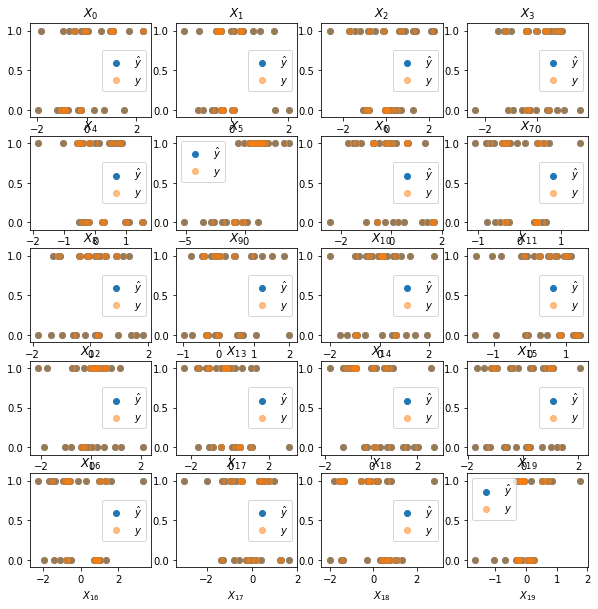

In [202]:
flat_index = 1
fig = plt.figure(figsize = (10,10))
for i in range(5):
    for j in range(4):
        ax = fig.add_subplot(5,4,flat_index)
        ax.scatter(X_test[flat_index-1,:], parameters['y_pred_test'], label = '$\hat{y}$')
        ax.scatter(X_test[flat_index-1,:], y_test, label = '$y$', alpha = 0.5)
        ax.set_xlabel('$X_{%d}$'%(flat_index-1))
        ax.set_title('$X_{%d}$'%(flat_index-1))
        ax.legend()
        flat_index += 1

In [ ]:
# Try logistic regression with TensorFlow on any data